In [7]:
import bt
import matplotlib

In [12]:
data = bt.get("spy,agg", start="2010-01-01", end="2022-01-01")
print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  spy        agg
Date                            
2010-01-04  87.129929  71.516144
2010-01-05  87.360596  71.841469
2010-01-06  87.422081  71.799942
2010-01-07  87.791122  71.716873
2010-01-08  88.083282  71.758377


In [13]:
s = bt.Strategy(
    "s1",
    [
        bt.algos.RunMonthly(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance(),
    ],
)

In [14]:
test = bt.Backtest(s, data)
res = bt.run(test)

<Axes: title={'center': 'Equity Progression'}>

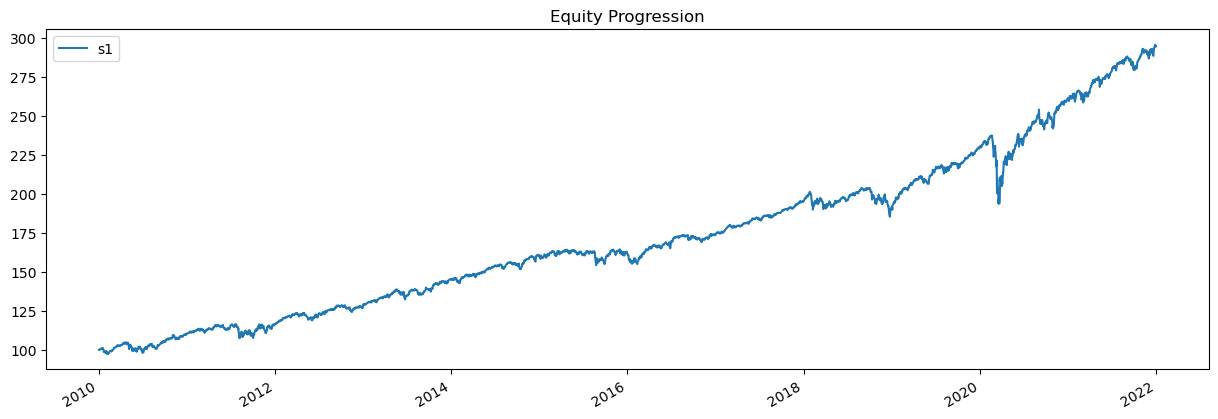

In [15]:
# first let's see an equity curve
res.plot()

In [16]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2021-12-31
Risk-free rate       0.00%

Total Return         194.42%
Daily Sharpe         1.12
Daily Sortino        1.71
CAGR                 9.42%
Max Drawdown         -18.41%
Calmar Ratio         0.51

MTD                  2.15%
3m                   5.43%
6m                   5.77%
YTD                  12.68%
1Y                   12.68%
3Y (ann.)            15.41%
5Y (ann.)            11.07%
10Y (ann.)           9.69%
Since Incep. (ann.)  9.42%

Daily Sharpe         1.12
Daily Sortino        1.71
Daily Mean (ann.)    9.36%
Daily Vol (ann.)     8.34%
Daily Skew           -1.00
Daily Kurt           19.28
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.37
Monthly Sortino      2.75
Monthly Mean (ann.)  9.50%
Monthly Vol (ann.)   6.92%
Monthly Skew         -0.17
Monthly Kurt         1.56
Best Month           7.57%
Worst Month          -6.44%

Yearly Sh

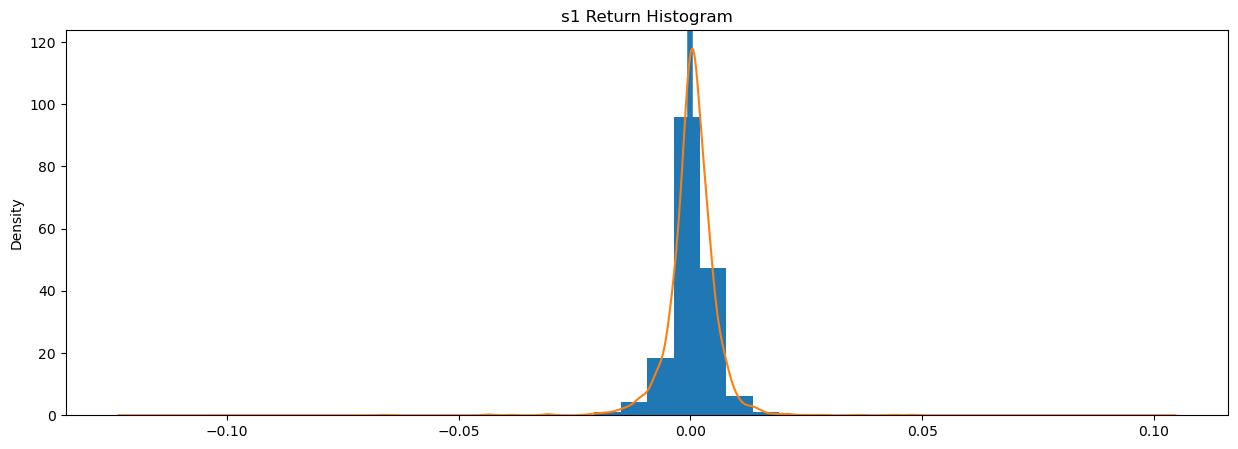

In [17]:
res.plot_histogram()

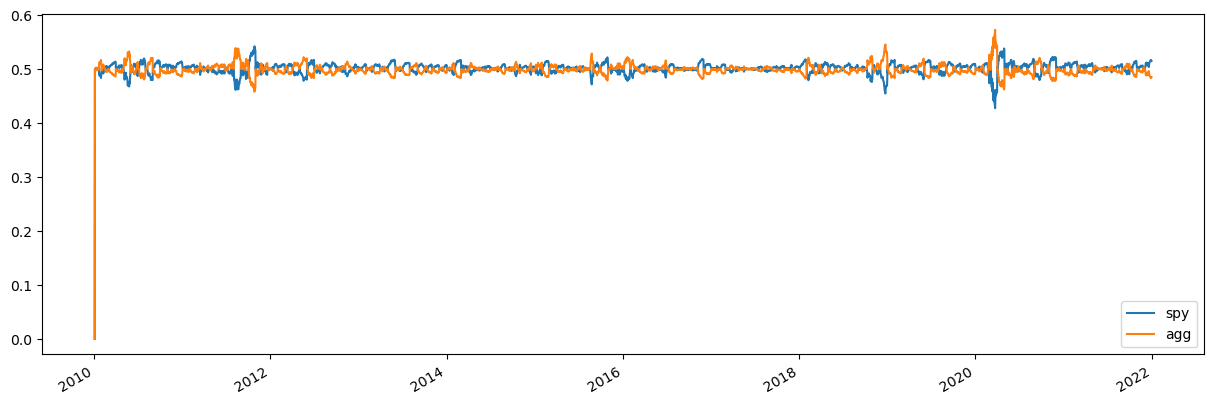

In [18]:
res.plot_security_weights()

<Axes: title={'center': 'Equity Progression'}>

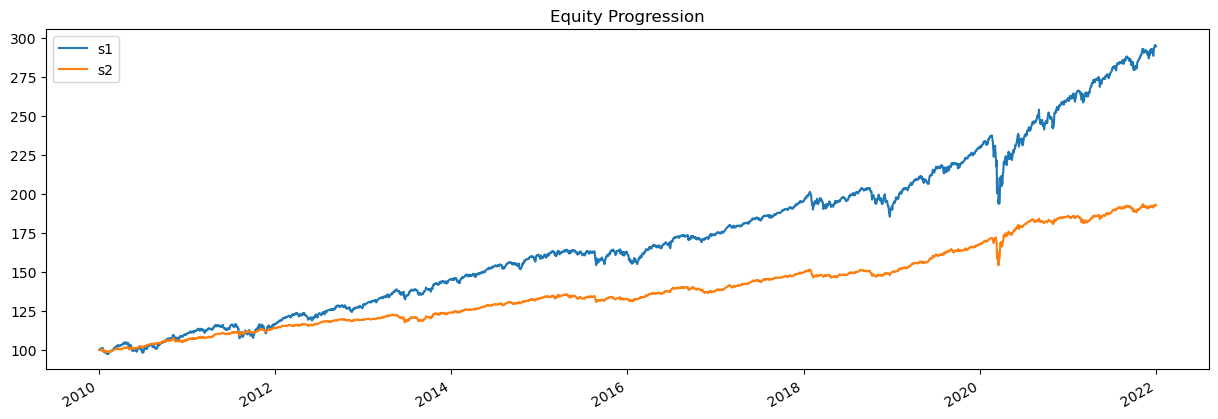

In [19]:
s2 = bt.Strategy(
    "s2",
    [
        bt.algos.RunWeekly(),
        bt.algos.SelectAll(),
        bt.algos.WeighInvVol(),
        bt.algos.Rebalance(),
    ],
)

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()

In [20]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2021-12-31  2021-12-31
Risk-free rate       0.00%       0.00%

Total Return         194.42%     92.69%
Daily Sharpe         1.12        1.32
Daily Sortino        1.71        1.97
CAGR                 9.42%       5.62%
Max Drawdown         -18.41%     -10.38%
Calmar Ratio         0.51        0.54

MTD                  2.15%       0.79%
3m                   5.43%       2.23%
6m                   5.77%       2.31%
YTD                  12.68%      3.63%
1Y                   12.68%      3.63%
3Y (ann.)            15.41%      8.77%
5Y (ann.)            11.07%      6.91%
10Y (ann.)           9.69%       5.39%
Since Incep. (ann.)  9.42%       5.62%

Daily Sharpe         1.12        1.32
Daily Sortino        1.71        1.97
Daily Mean (ann.)    9.36%       5.56%
Daily Vol (ann.)     8.34%       4.22%
Daily Skew           -1.00       -2.41
Daily Kurt  